# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 6)

In [3]:
se=0.99
sp=0.99
S_val = [0.81, 0.91, 0.93, 0.99]
c_val = [0.02, 0.1, 0.2, 1.0]
xs = np.array([np.log(c) for c in c_val])
ys = np.array([np.log((S-1+sp)/(sp+se-1)) for S in S_val])
xs = xs.reshape(-1,1)
reg = Ridge(alpha=1.0).fit(xs, ys)
# reg.score(xs, ys)
d = reg.coef_[0]
# def dil_fun(x, y, d):
#     y = d*x
#     return y



In [4]:

# d=0.05126233
# d=0.0427
S_val = [0.81, 0.91, 0.93, 0.99]
c_val = [0.02, 0.1, 0.2, 1.0]
c = np.linspace(0, 1.0, 100000)
S = 1 - sp + (sp+se-1)*np.power(c, d)

In [5]:
d

0.04549745359504318

## Visualization of dilution

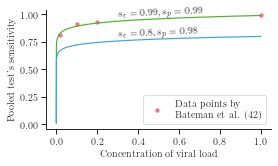

In [8]:
utils.latexify(font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect,fig_height))

sns.scatterplot(x=c_val, y=S_val, ax=ax, color=palette[0], label='Data points by\nBateman et al. (42)')
ax.legend()

se, sp=0.99, 0.99
S = 1 - sp + (sp+se-1)*np.power(c, d) 
sns.lineplot(x=c, y=S, ax=ax, color=palette[2], legend=None)
ax.text(0.3,0.98,r'$s_e={se}, s_p={sp}$'.format(se=se, sp=sp),rotation=2.5)

se, sp=0.8, 0.98
S = 1 - sp + (sp+se-1)*np.power(c, d) 
sns.lineplot(x=c, y=S, ax=ax, color=palette[4], legend=None)
ax.text(0.3,0.8,r'$s_e={se}, s_p={sp}$'.format(se=se, sp=sp),rotation=2.5)

sns.despine()

ax.set_ylabel('Pooled test\'s sensitivity')
ax.set_xlabel('Concentration of viral load')
ax.legend()
fig.tight_layout()
fig.savefig('figures/sci-adv-figs1.pdf')

## Visualization of group sizes and tests

In [3]:
path = "./person-icon.png"
image = plt.imread(path)

In [40]:
def plot_images(x, y, image, ax=None):
    ax = ax or plt.gca()

    for xi, yi in zip(x,y):
        im = OffsetImage(image, zoom=1)#72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)

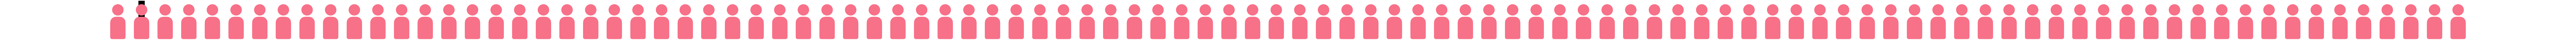

In [64]:
x = np.arange(100)
y = np.array(100*[0])

utils.latexify(font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=1)
fig, ax = plt.subplots(figsize=(50*fig_height*fig_aspect,fig_height))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)

sns.despine
ax.scatter(x,y, alpha=0)
ax.set_ylim([-2,9.0])
plot_images(x, y, image, ax=ax)

ax.axvline(x=1, linewidth=50, c='black')

fig.tight_layout()
fig.savefig('figures/cool_viz.pdf')